In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
trips = pd.read_csv("Data/trip.csv")

In [3]:
trips
# 669959 rows × 11 columns

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103
5,4927,103,8/29/2013 18:54,Golden Gate at Polk,59,8/29/2013 18:56,Golden Gate at Polk,59,527,Subscriber,94109
6,4500,109,8/29/2013 13:25,Santa Clara at Almaden,4,8/29/2013 13:27,Adobe on Almaden,5,679,Subscriber,95112
7,4563,111,8/29/2013 14:02,San Salvador at 1st,8,8/29/2013 14:04,San Salvador at 1st,8,687,Subscriber,95112
8,4760,113,8/29/2013 17:01,South Van Ness at Market,66,8/29/2013 17:03,South Van Ness at Market,66,553,Subscriber,94103
9,4258,114,8/29/2013 11:33,San Jose City Hall,10,8/29/2013 11:35,MLK Library,11,107,Subscriber,95060


In [4]:
trips.describe()

,id,duration,start_station_id,end_station_id,bike_id
count,669959.000000,6.699590e+05,669959.000000,669959.000000,669959.000000
mean,460382.009899,1.107950e+03,57.851876,57.837438,427.587620
std,264584.458487,2.225544e+04,17.112474,17.200142,153.450988
min,4069.000000,6.000000e+01,2.000000,2.000000,9.000000
25%,231082.500000,3.440000e+02,50.000000,50.000000,334.000000
50%,459274.000000,5.170000e+02,62.000000,62.000000,440.000000
75%,692601.000000,7.550000e+02,70.000000,70.000000,546.000000
max,913460.000000,1.727040e+07,84.000000,84.000000,878.000000


In [5]:
#paso la duracion de seg a minutos y filtro el min y max
trips.duration /= 60
trips = trips[trips.duration <= 370]
trips = trips[trips.duration >3]
trips.describe()


,id,duration,start_station_id,end_station_id,bike_id
count,643411.000000,643411.000000,643411.000000,643411.000000,643411.000000
mean,460163.031345,14.215900,57.928604,57.935932,427.830879
std,264769.024504,27.510032,17.078623,17.173131,153.168523
min,4073.000000,3.016667,2.000000,2.000000,9.000000
25%,230717.500000,6.016667,50.000000,50.000000,334.000000
50%,458673.000000,8.800000,62.000000,62.000000,441.000000
75%,692694.500000,12.716667,70.000000,70.000000,546.000000
max,913460.000000,369.966667,84.000000,84.000000,878.000000


In [6]:
trip_station_start = trips[trips.start_station_id == 70]
trip_station_start

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
65,4673,3.983333,8/29/2013 15:48,San Francisco Caltrain (Townsend at 4th),70,8/29/2013 15:52,Townsend at 7th,65,568,Subscriber,94110
88,4177,4.633333,8/29/2013 11:03,San Francisco Caltrain (Townsend at 4th),70,8/29/2013 11:08,2nd at South Park,64,371,Subscriber,94117
120,4715,5.616667,8/29/2013 16:23,San Francisco Caltrain (Townsend at 4th),70,8/29/2013 16:29,Townsend at 7th,65,489,Customer,94109
149,4716,6.250000,8/29/2013 16:24,San Francisco Caltrain (Townsend at 4th),70,8/29/2013 16:30,Townsend at 7th,65,382,Customer,95118
165,5102,6.533333,8/29/2013 22:53,San Francisco Caltrain (Townsend at 4th),70,8/29/2013 23:00,Howard at 2nd,63,348,Customer,37206
192,5067,7.050000,8/29/2013 21:38,San Francisco Caltrain (Townsend at 4th),70,8/29/2013 21:45,San Francisco Caltrain 2 (330 Townsend),69,535,Subscriber,94133
224,4837,7.766667,8/29/2013 17:46,San Francisco Caltrain (Townsend at 4th),70,8/29/2013 17:54,Townsend at 7th,65,361,Customer,94107
264,4833,9.050000,8/29/2013 17:45,San Francisco Caltrain (Townsend at 4th),70,8/29/2013 17:54,Market at Sansome,77,619,Subscriber,94115
282,4282,9.533333,8/29/2013 11:54,San Francisco Caltrain (Townsend at 4th),70,8/29/2013 12:04,Townsend at 7th,65,538,Customer,37206
289,4834,9.650000,8/29/2013 17:45,San Francisco Caltrain (Townsend at 4th),70,8/29/2013 17:55,Embarcadero at Folsom,51,615,Customer,94111


In [7]:
trip_station_end = trips[trips.end_station_id == 70]
trip_station_end

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
74,5105,4.083333,8/29/2013 23:12,Townsend at 7th,65,8/29/2013 23:16,San Francisco Caltrain (Townsend at 4th),70,348,Customer,37206
106,4871,5.266667,8/29/2013 18:06,5th at Howard,57,8/29/2013 18:11,San Francisco Caltrain (Townsend at 4th),70,348,Customer,94107
108,4744,5.316667,8/29/2013 16:52,5th at Howard,57,8/29/2013 16:57,San Francisco Caltrain (Townsend at 4th),70,379,Customer,95032
118,4640,5.583333,8/29/2013 15:19,2nd at South Park,64,8/29/2013 15:24,San Francisco Caltrain (Townsend at 4th),70,438,Subscriber,94110
137,4785,6.016667,8/29/2013 17:13,Yerba Buena Center of the Arts (3rd @ Howard),68,8/29/2013 17:19,San Francisco Caltrain (Townsend at 4th),70,562,Subscriber,94401
138,4730,6.033333,8/29/2013 16:37,Townsend at 7th,65,8/29/2013 16:43,San Francisco Caltrain (Townsend at 4th),70,615,Subscriber,94112
143,4695,6.150000,8/29/2013 16:05,Townsend at 7th,65,8/29/2013 16:11,San Francisco Caltrain (Townsend at 4th),70,431,Customer,95118
148,4496,6.250000,8/29/2013 13:19,Townsend at 7th,65,8/29/2013 13:25,San Francisco Caltrain (Townsend at 4th),70,413,Subscriber,94107
187,4641,7.000000,8/29/2013 15:19,Powell Street BART,39,8/29/2013 15:26,San Francisco Caltrain (Townsend at 4th),70,522,Subscriber,94102
211,4849,7.500000,8/29/2013 17:53,Market at 4th,76,8/29/2013 18:01,San Francisco Caltrain (Townsend at 4th),70,592,Subscriber,94061


In [8]:
result = pd.merge(trip_station_start, trip_station_end, how='outer', on='id')
result

,id,duration_x,start_date_x,start_station_name_x,start_station_id_x,end_date_x,end_station_name_x,end_station_id_x,bike_id_x,subscription_type_x,...,duration_y,start_date_y,start_station_name_y,start_station_id_y,end_date_y,end_station_name_y,end_station_id_y,bike_id_y,subscription_type_y,zip_code_y
0,4673,3.983333,8/29/2013 15:48,San Francisco Caltrain (Townsend at 4th),70.0,8/29/2013 15:52,Townsend at 7th,65.0,568.0,Subscriber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4177,4.633333,8/29/2013 11:03,San Francisco Caltrain (Townsend at 4th),70.0,8/29/2013 11:08,2nd at South Park,64.0,371.0,Subscriber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4715,5.616667,8/29/2013 16:23,San Francisco Caltrain (Townsend at 4th),70.0,8/29/2013 16:29,Townsend at 7th,65.0,489.0,Customer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4716,6.250000,8/29/2013 16:24,San Francisco Caltrain (Townsend at 4th),70.0,8/29/2013 16:30,Townsend at 7th,65.0,382.0,Customer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5102,6.533333,8/29/2013 22:53,San Francisco Caltrain (Townsend at 4th),70.0,8/29/2013 23:00,Howard at 2nd,63.0,348.0,Customer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5067,7.050000,8/29/2013 21:38,San Francisco Caltrain (Townsend at 4th),70.0,8/29/2013 21:45,San Francisco Caltrain 2 (330 Townsend),69.0,535.0,Subscriber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4837,7.766667,8/29/2013 17:46,San Francisco Caltrain (Townsend at 4th),70.0,8/29/2013 17:54,Townsend at 7th,65.0,361.0,Customer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4833,9.050000,8/29/2013 17:45,San Francisco Caltrain (Townsend at 4th),70.0,8/29/2013 17:54,Market at Sansome,77.0,619.0,Subscriber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4282,9.533333,8/29/2013 11:54,San Francisco Caltrain (Townsend at 4th),70.0,8/29/2013 12:04,Townsend at 7th,65.0,538.0,Customer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4834,9.650000,8/29/2013 17:45,San Francisco Caltrain (Townsend at 4th),70.0,8/29/2013 17:55,Embarcadero at Folsom,51.0,615.0,Customer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
result['duration_x'].max(axis=0)

368.23333333333335

In [10]:
result['duration_y'].max(axis=0)

368.60000000000002

In [11]:
result.count()

id                      110557
duration_x               48474
start_date_x             48474
start_station_name_x     48474
start_station_id_x       48474
end_date_x               48474
end_station_name_x       48474
end_station_id_x         48474
bike_id_x                48474
subscription_type_x      48474
zip_code_x               48303
duration_y               62460
start_date_y             62460
start_station_name_y     62460
start_station_id_y       62460
end_date_y               62460
end_station_name_y       62460
end_station_id_y         62460
bike_id_y                62460
subscription_type_y      62460
zip_code_y               62276
dtype: int64

In [12]:
# promedio del tiempo de los viajes que salen de la estacion 70
trip_station_start['duration'].mean()

12.308430292527824

In [13]:
# promedio del tiempo de los viajes que llegan a la estacion 70
trip_station_end['duration'].mean()

11.05578130003199

In [14]:
trip_station_start['duration'].max(axis=0)

368.23333333333335

In [15]:
trip_station_start['duration'].min(axis=0)

3.0166666666666666

In [16]:
trip_station_end['duration'].max(axis=0)

368.60000000000002

In [17]:
trip_station_end['duration'].min(axis=0)

3.0166666666666666

In [18]:
trip_station_start['duration'].count()

48474

In [19]:
trip_station_end['duration'].count()

62460

In [20]:
bikes = trips.loc[:,'bike_id']
bikes

35        309
36        416
37        366
38        409
39        379
40        429
41        502
42        619
43         35
44        519
45         83
46        316
47        632
48        348
49        664
50        634
51        334
52        528
53        319
54        268
55        150
56        506
57        613
58        259
59        315
60        553
61        567
62        375
63        438
64        505
         ... 
669925    431
669926    376
669927    259
669928    449
669929    161
669932    470
669933    421
669934    313
669935    535
669936    400
669937    575
669938    285
669939    317
669940    590
669941    462
669942    566
669943    578
669944    357
669945    375
669947    140
669948     57
669950     56
669951    617
669952    561
669953    292
669954    335
669955    259
669956    466
669957    461
669958    318
Name: bike_id, dtype: int64

<IPython.core.display.Javascript object>


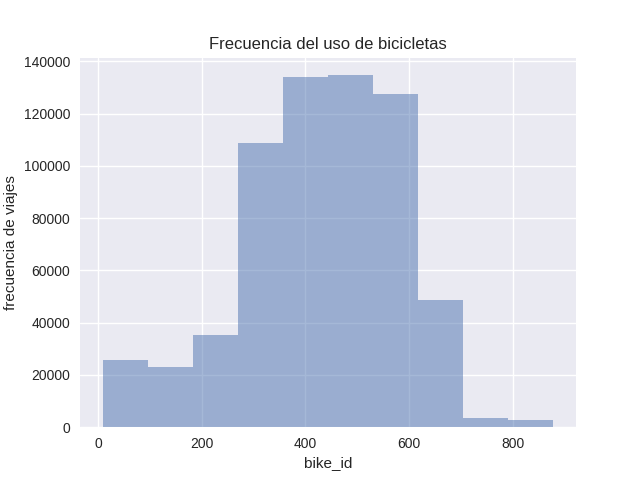

In [28]:
# frecuencia de viajes by bicicletas
%matplotlib notebook
bikes.plot.hist(alpha=0.5, title="Frecuencia del uso de bicicletas")
plt.xlabel("bike_id")
plt.ylabel("frecuencia de viajes")

In [29]:
print ((trips.bike_id.unique()).min()) #9
print ((trips.bike_id.unique()).max()) #878
print (len(trips.bike_id.unique())) #700

9
878
700


In [23]:
#De la estacion 70, la mayoria de las bicicletas que salen son las de mayor frecuencia
filter_bikes_start = trip_station_start[trip_station_start.bike_id >= 300]
filter_bikes_start = filter_bikes_start[filter_bikes_start.bike_id <= 600]
filter_bikes_start['bike_id'].count() #37271

#trip_station_start.count() #48474

37271

In [24]:
#De la estacion 70, la mayoria de las bicicletas que llegan son las de mayor frecuencia
filter_bikes_end = trip_station_end[trip_station_end.bike_id >= 300]
filter_bikes_end = filter_bikes_end[filter_bikes_end.bike_id <= 600]
filter_bikes_end['bike_id'].count() #47819

#trip_station_end.count() #62460

47819